# Example of elastic deformation on Tissue and it's mask

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
from typing import Tuple, Union, List
from PIL import Image
from copy import deepcopy
import os
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage, ToTensor
from torchvision.transforms.functional import crop
from matplotlib import pyplot as plt

In [3]:
from biomedical_image_segmentation import get_root_path
from biomedical_image_segmentation.elastic_deform import AffineTransform, ElasticTransform
from biomedical_image_segmentation.plot_utils import insert_grid

In [4]:
PROJECT_PATH = get_root_path()
PLOTS_PATH = os.path.join(PROJECT_PATH, "images")

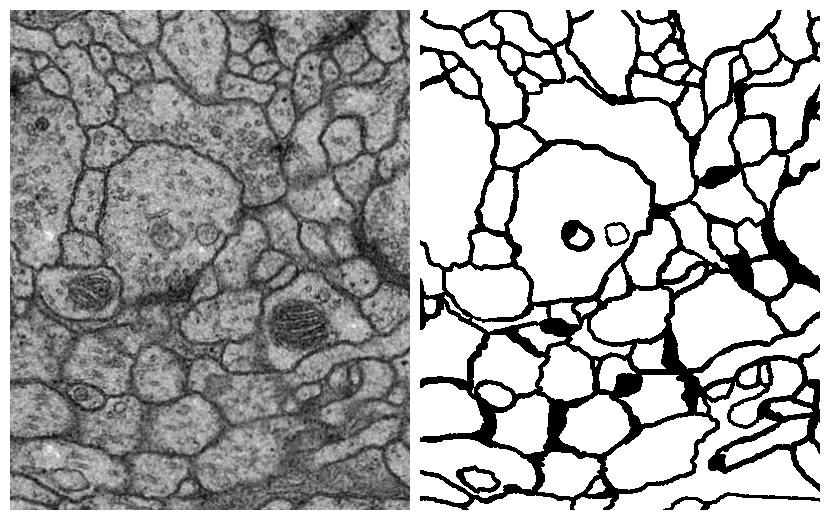

In [5]:
img = Image.open(os.path.join(get_root_path(), "data", "samples", "train", "1.tif"))
img = crop(img, top=0, left=0, height=500, width=400)
img = np.expand_dims(np.array(img), axis=-1)

mask = Image.open(os.path.join(get_root_path(), "data", "masks", "train", "1.tif"))
mask = crop(mask, top=0, left=0, height=500, width=400)
mask = np.expand_dims(np.array(mask), axis=-1)
ToPILImage()(make_grid([ToTensor()(img), ToTensor()(mask)], pad_value=1, padding=10))

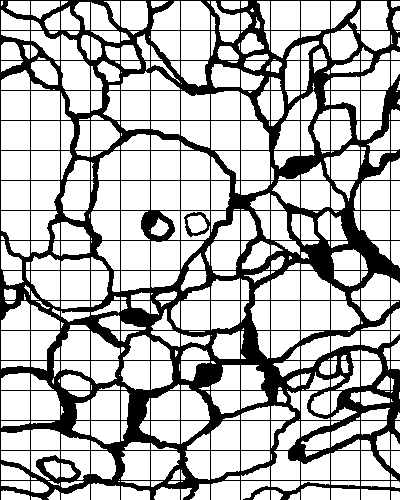

In [6]:
img_with_grid = insert_grid(mask, grid_size=(30, 30), color=(255,255,255))
mask_with_grid = insert_grid(mask, grid_size=(30, 30), )
ToPILImage()(mask_with_grid)

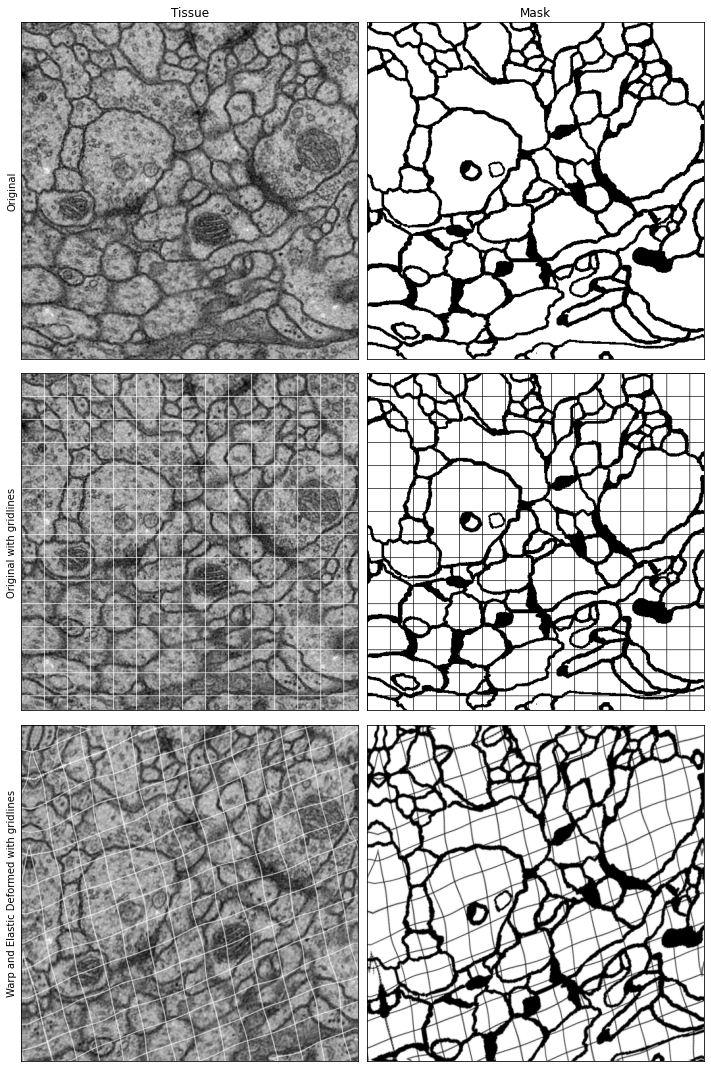

In [7]:
img = Image.open(os.path.join(get_root_path(), "data", "samples", "train", "1.tif"))
img = np.expand_dims(np.array(img), axis=-1)

mask = Image.open(os.path.join(get_root_path(), "data", "masks", "train", "1.tif"))
mask = np.expand_dims(np.array(mask), axis=-1)

img_with_grid = insert_grid(img, grid_size=(35, 35), color=(255., 255., 255.))
mask_with_grid = insert_grid(mask, grid_size=(35, 35), color=1.0)

fig, axes = plt.subplots(
    nrows=3, 
    ncols=2, 
    figsize=(10, 15),
    squeeze=True, sharex=True, 
    sharey=True)

axes[0, 0].imshow(img, cmap="gray")
axes[0, 0].set_title("Tissue")
axes[0, 0].set_ylabel("Original")
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
axes[0, 1].imshow(mask, cmap="gray")
axes[0, 1].set_title("Mask")
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

axes[1, 0].imshow(img_with_grid, cmap="gray")
axes[1, 0].set_ylabel("Original with gridlines")
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])
axes[1, 1].imshow(mask_with_grid, cmap="gray")
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

seed = 10
angle = 15.
alpha = 40.
af = AffineTransform(angle=angle, alpha=alpha, seed=40)
trnsf_img = af.transform(img_with_grid)
trnsf_mask = af.transform(mask_with_grid)

sigma = 20.
alpha = 240.
es = ElasticTransform(sigma=sigma, alpha=alpha, seed=40)
trnsf_img = es.transform(trnsf_img)
trnsf_mask = es.transform(trnsf_mask)

axes[2, 0].imshow(trnsf_img, cmap="gray")
axes[2, 0].set_ylabel("Warp and Elastic Deformed with gridlines")
axes[2, 0].set_xticks([])
axes[2, 0].set_yticks([])
axes[2, 1].imshow(trnsf_mask, cmap="gray")
axes[2, 1].set_xticks([])
axes[2, 1].set_yticks([])

plt.tight_layout()
plt.savefig(
    os.path.join(PLOTS_PATH, "Original and Elastic Deformed.jpeg"), 
    dpi=100)
plt.show()